<a href="https://colab.research.google.com/github/wesfdf/test/blob/main/Willkommen_bei_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-pptx
!pip install cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pptx import Presentation
prs  = Presentation('/content/Vorlage.pptx')
slide = prs.slides.add_slide(prs.slide_layouts[5])
#----------------------- Eleganter über templates!?
for s_ in slide.placeholders:
    print('ID = {0:d}, Shape name is \
          "{1:s}"'.format(s_.placeholder_format.idx,s_.name))

ID = 0, Shape name is           "Title 3"
ID = 1, Shape name is           "Subtitle 4"
ID = 12, Shape name is           "Text Placeholder 1"
ID = 13, Shape name is           "Text Placeholder 2"
ID = 16, Shape name is           "Text Placeholder 5"


In [62]:
import cairosvg
!curl -o logo.svg https://upload.wikimedia.org/wikipedia/commons/1/16/Bosch-logo.svg #"https://de.wikipedia.org/wiki/Robert_Bosch_GmbH#/media/Datei:Bosch-logo.svg" #https://colab.research.google.com/img/colab_favicon_256px.png
cairosvg.svg2png(
    url="https://upload.wikimedia.org/wikipedia/commons/1/16/Bosch-logo.svg", write_to="logo.png")
from google.colab import files as FILE
import os
import requests
from PIL import Image

img_data = requests.get("https://images.praxisvita.de/augenkrankheiten-sehschwaechen-simulation-beispielbild-katzenbaby,id=3acaf604,b=praxisvita,w=700,rm=sk.webp").content
with open('kat.webp', 'wb') as handler:
    handler.write(img_data)

img_data = requests.get("https://www.designtagebuch.de/wp-content/uploads/mediathek//2019/01/bosch-markenzeichen-1100x825.jpg").content
with open('Bosch.jpg', 'wb') as handler:
    handler.write(img_data)

image = Image.open('kat.webp')
image = image.convert('RGB')
image.save('kat.png', 'png')
    #handler.save('converting-from-webp-to-png-format.png', 'png')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3383  100  3383    0     0  20503      0 --:--:-- --:--:-- --:--:-- 20503


In [4]:
from bs4 import BeautifulSoup

URL = 'https://de.wikipedia.org/wiki/Robert_Bosch_GmbH'
website = requests.get(URL)
soup = BeautifulSoup(website.content, 'html.parser')
print(soup.shape)
print(type(soup))

None
<class 'bs4.BeautifulSoup'>


https://www.crummy.com/software/BeautifulSoup/bs4/doc/#the-string-argument


In [5]:
import re
a0 = soup.find("h1")
a = soup.find("a", text="Sitz")
a1 = soup.find("a", text="Mitarbeiterzahl")
a2 = soup.find("a", text="Umsatz")
#a3 = soup
#print(a)
#print(type(a))

b0 = a0.get_text()
b = a.find_next("a")
b1 = a1.find_next("td")
b2 = a2.find_next("td")
print(b0)

c = b.get("title")
c1 = b1.get_text()
c2 = b2.get_text()

d1 = re.findall(r'\(.*?\)', c1)
d1a = c1.split()[0]
d2 = re.findall(r'\(.*?\)', c2)
d2a = c2.split()[0]
print(d1a)
print(d2a)

e1 = d1[0].strip("()")
e2 = d2[0].strip("()")
if e1 != e2:
  print("Problem")
else:
  print("Goo!")
print(e1)

Robert Bosch GmbH
401.300
78,8
Goo!
2021


https://www.youtube.com/watch?v=3fcKKZMFbyA

In [6]:
import requests
import numpy as np
RB_ID=[692466, 101007237, 101007229, 653531, 318529, 285224, 645145]#Projekte von Bosch die interessant sind
r2 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/data.json?pic=999908787&refreshIamUser=true")#Firma
#Get the ID From Firma-Website
r=[]
SOUP=[]
for i in RB_ID:
  strIN="https://cordis.europa.eu/api/details?contenttype=project&rcn="+str(i)+"&lang=en&paramType=id"
  SOUP=np.append(SOUP, BeautifulSoup(requests.get(strIN).text, 'html.parser'))

#print(SOUP)
r4 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/publicProjects.json?pic=999908787&refreshIamUser=true")#PublicProjects
r3 = requests.get("https://cordis.europa.eu/api/details?contenttype=project&rcn=101007229&lang=en&paramType=id")#Projekt 1 of 7 of 158 Projects
soup2 = BeautifulSoup(r2.text, 'html.parser')
soup3 = BeautifulSoup(r3.text, 'html.parser')
soup4 = BeautifulSoup(r4.text, 'html.parser')

In [7]:
str3="ecContribution\":"

w = []
wS = 0.0
for i in SOUP:
  i3a = i.find(str3)
  i3b = i.find(",\"totalCost")
  w = np.append(w, i[i3a+len(str3):i3b])
  wS += float(i[i3a+len(str3):i3b])
print(w)
ggg = round(wS/1000000.0,1)
print(round(wS/1000000.0,1))

['12227386.14' '20736450.93' '7797661.5' '5673272.5' '3295000' '4005872'
 '3774006']
57.5


In [8]:
import time
from datetime import datetime, timedelta

str3a="startDateCode\":\""
str3b="endDateCode\":\""

datesa = []
datesb = []

dictt = []

wS = 0.0
for i in SOUP:
  i3aa = i.find(str3a)
  i3ab = i.find("\",\"endDate")
  datea = datetime.strptime(i[i3aa+len(str3a):i3ab], "%Y-%m-%d").strftime('%Y-%m-%d')
  dictt = np.append(dictt, datetime.strptime(i[i3aa+len(str3a):i3ab], "%Y-%m-%d").strftime('%Y'))
  i3ba = i.find(str3b)
  i3bb = i.find("\",\"website")
  dateb = datetime.strptime(i[i3ba+len(str3b):i3bb], "%Y-%m-%d").strftime('%Y-%m-%d')
  datesa = np.append(datesa, [datea])
  datesb = np.append(datesb, [dateb])
  
  print(datea, dateb)

Nulla=datesa[0]
Nullb=datesb[0]
for i in datesa:
  if (i<Nulla):
    Nulla = i
for i in datesb:
  if (i>Nullb):
    Nullb = i

print("von: ", Nulla, Nullb)

NullaE=datesa[0]
for i in datesa:
  if (i>NullaE):
    NullaE = i

gg = datetime.strptime(NullaE, "%Y-%m-%d").strftime('%Y')
print(gg)
print(str(gg))
print("Letztes: ", datetime.strptime(NullaE, "%Y-%m-%d").strftime('%Y'))


2016-05-01 2019-04-30
2021-05-01 2024-04-30
2021-05-01 2024-04-30
2015-05-01 2018-04-30
2012-10-01 2016-03-31
2011-05-01 2014-10-31
2015-01-01 2017-12-31
von:  2011-05-01 2024-04-30
2021
2021
Letztes:  2021


In [9]:
#my_dict = {i:dictt.count(i) for i in dictt}
unique, counts = np.unique(dictt, return_counts=True)
dictt2 = dict(zip(unique, counts))

In [10]:
strS4a = "title\":\""
strS4b = "\",\"acronym"
strS4aq = "ecContribution\":"
strS4bq = ",\"totalCost"
strS4aw = "totalCost\":"
strS4bw = ",\"contentCreationDate"
dataS4 = []
dataS4q = []
dataS4w = []
dataS4e = []
for i in SOUP:
  i3ca = i.find(strS4a)
  i3cb = i.find(strS4b)
  dataS4 = np.append(dataS4, i[i3ca+len(strS4a):i3cb])
  i3ca = i.find(strS4aq)
  i3cb = i.find(strS4bq)
  dataS4q = np.append(dataS4q, i[i3ca+len(strS4aq):i3cb])
  i3ca = i.find(strS4aw)
  i3cb = i.find(strS4bw)
  dataS4w = np.append(dataS4w, i[i3ca+len(strS4aw):i3cb])
  a = i.count("netEcContribution")
  print(a)
  dataS4e = np.append(dataS4e, a-1)
print(dataS4)
print(dataS4q)
print(dataS4w)
print(dataS4e)

37
36
28
10
9
10
10
['Power Semiconductor and Electronics Manufacturing 4.0'
 'Trusted European SiC Value Chain for a greener Economy'
 'Vertical GaN on Silicon: Wide Band Gap Power at Silicon Cost'
 'Five Volt Lithium Ion Batteries with Silicon Anodes produced for Next Generation Electric Vehicles'
 'POWER SoC With Integrated PassivEs'
 'Smart Battery Control System based on a Charge-equalization Circuit for an advanced Dual-Cell Battery for Electric Vehicles'
 'Haptic Printed and Patterned Interfaces for Sensitive Surface']
['12227386.14' '20736450.93' '7797661.5' '5673272.5' '3295000' '4005872'
 '3774006']
['61919643.75' '89087499.26' '26998506.26' '5927428.75' '5123890'
 '6548215' '3774006']
[36. 35. 27.  9.  8.  9.  9.]


In [122]:
PaStrA = "\",\"address"
PaStrB = "name\":\""
Parti = []
for i in SOUP:
  ii = i
  counter = 0
  while True:
    i3caa = ii.find(PaStrA)
    if i3caa == -1:
      break
    dstr00 = ii[:i3caa]
    i3cba = dstr00.rfind(PaStrB)
    #print(ii[i3cba+len(PaStrB):i3caa])
    #if counter != 0:
    blllqq = ii[i3cba+len(PaStrB):i3caa].replace("\\u0026", "&").replace("\\u0027", "\'")#'
    Parti = np.append(Parti, blllqq)
    ii = ii[i3caa+200:]
    counter += 1
  
PartiSet = list(set(Parti))
print(len(Parti))
print(len(PartiSet))
  #i3ca = i.find(PaStrA)
  #ii = i[i3ca-200:]
  #i3cb = ii.find(PaStrB)
  #print(i[i3ca:])
  #Parti = np.append(Parti, ii[i3ca-200+i3cb+len(PaStrB):i3ca])

#print(Parti)

140
114


In [85]:
from collections import Counter
numbers = Parti

counts = dict(Counter(numbers))
duplicates = {key:value for key, value in counts.items() if value > 1}

print(duplicates)
Partix = dict(sorted(duplicates.items(), key=lambda item: item[1], reverse=True))
print(Partix)
print(len(Partix))

{'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'AVL LIST GMBH': 3, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRONIK GMBH & CO. KG': 2, 'ROBERT BOSCH GMBH': 7, 'ION BEAM SERVICES': 2, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES': 2, 'AIXTRON SE': 2, 'EV GROUP E. THALLNER GMBH': 2, 'CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA': 2, 'UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA': 2, 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS': 2, 'UNIVERSITE DE LILLE': 2, 'ARKEMA FRANCE SA': 2, 'VRIJE UNIVERSITEIT BRUSSEL': 2}
{'ROBERT BOSCH GMBH': 7, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'AVL LIST GMBH': 3, 'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRO

In [11]:
str3c = "participants\":["

datac = []
for i in SOUP:
  i3ca = i.find(str3c)
  i3cb = i.find("],\"partners")
  datac = np.append(datac, i[i3ca+len(str3c):i3cb])

print(datac)

cou = 0
cou = 0
for i in datac:
  cou += i.count("country")

print(cou)

str3ca = "country\":{\"name\":\""

dataca = []
for i in SOUP:
  while True:
    i3caa = i.find(str3ca)
    i3cba = i.find("\",\"isoCode")
    #print("a: ", i3caa, "b: ", i3cba)
    #print(i3caa)
    if i3caa == -1:
      break
    #print(i3caa)
    #print(i[i3caa+len(str3ca):i3cba])
    dataca = np.append(dataca, i[i3caa+len(str3ca):i3cba])
    i = i[i3caa+len(str3ca)+25:]
    
    #print(i3cba)
    #print(i)
print(dataca)
print(len(set(dataca)))

str3cb = "framework\":\""

datacb = []
for i in SOUP:
  i3cab = i.find(str3cb)
  i3cbb = i.find("\",\"language")
  datacb = np.append(datacb, i[i3cab+len(str3cb):i3cbb])

print(list(set(datacb)))
print(len(set(datacb)))

['{"name":"KAI KOMPETENZZENTRUM AUTOMOBIL - UND INDUSTRIEELEKTRONIK GMBH","address":{"street":"EUROPASTRASSE 8","city":"VILLACH ST MAGDALEN","postalCode":"9524"},"country":{"name":"Austria","isoCode":"AT","euCode":"AT"},"terminated":false,"order":2,"activityType":"Private for-profit entities (excluding Higher or Secondary Education Establishments)","contribution":93559.5,"netEcContribution":93559.5,"nonEcContribution":530170.5,"formula":"participant: 623730 - 93559.5 - 0","website":"www.k-ai.at","email":"","type":"participant","contacts":[],"organizationId":"952872226","rcn":"2498702","active":true,"sme":false,"regions":"S\\u00fcd\\u00f6sterreich|K\\u00e4rnten|Klagenfurt-Villach"},{"name":"KNOW-CENTER GMBH RESEARCH CENTER FOR DATA-DRIVEN BUSINESS \\u0026 BIG DATA ANALYTICS","address":{"street":"INFFELDGASSE 13\\/6","city":"GRAZ","postalCode":"8010"},"country":{"name":"Austria","isoCode":"AT","euCode":"AT"},"terminated":false,"order":3,"activityType":"Research Organisations","contributi

In [12]:
a=soup2.get_text()
pic1=a.find("\"pic\":")
pic2=a.find("\",\"legalName")
print(pic1+7, pic2)
pic0=a[pic1+7:pic2]
print(pic0)
a1=a[a.find("Keywords"):]

Keywords=[]
for i in range(0,5):
  #n=
  a1=a1[a1.find("text")+7:]
  a3=a1.find('\"')
  #a1=
  Keywords = np.append(Keywords, a1[:a3])

print(Keywords)

50 59
999984059
['Road transport' 'Automotive engineering'
 'Electrical and electronic engineering: semiconductors, components, systems'
 'Intelligent Transport Systems (ITS)' '5g']


In [13]:
!pip install python-docx
from docx.shared import Pt
from docx.shared import RGBColor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from pptx import Presentation
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches

# create presentation with 1 slide ------
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])

# define chart data ---------------------
chart_data = CategoryChartData()
chart_data2 = CategoryChartData()
'''
#chart_data.set_size({'width': 624, 'height': 480})
chart_data.add_series({
        #'name':       'Total Vulnerabilities',
        #'data_labels': {'value': 1},
        'categories': ['2011', '2012', '2013'],
        'add_series':     ["Graph Data", 2, 1, 6],
    })
'''
chart111k=[]
chart111v=[]
chart111c=[]
for key,value in dictt2.items():
  chart111k = np.append(chart111k, str(key))
  chart111v = np.append(chart111v, value)
for i in range(0,len(chart111k)):
  chart111c = np.append(chart111c, "{'fill': {'color': '#618ECD'}},")
chartLen=len(chart111k)
chart_data.categories = chart111k#['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
chart_data.add_series('', chart111v)#(1,2,3,4,5,6,7,8,9,10,11,12))
chart_data.points = chart111c
'''[{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},
                     {'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},
                     {'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},]'''
chart_data.categories.LabelAngle = -90

chart_data2.categories = ['i', 'i', 'i', 'i']
chart_data2.add_series('', (1,2,3,4))
chart_data2.points = [{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},]
chart_data2.categories.LabelAngle = -90

#chart_data.plots[0].vary_by_categories = False

#chart_data.categories.legend.font.size = 10
# Configure the series of the chart from the dataframe data.
#chart = chart_data.add_chart({'type': 'column'})
'''
chart.add_series({
    'categories': ['Sheet1', 1, 0, 21, 0],
    'values':     ['Sheet1', 1, 1, 21, 1],
    'gap':        10,
})
'''
'''
# add chart to slide --------------------
x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
slide.shapes.add_chart(
    XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data
)'''

'\n# add chart to slide --------------------\nx, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)\nslide.shapes.add_chart(\n    XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data\n)'

#NLPs

Zusammenfassung:

Überprüfung von einigen keyword extractions verfahren:
https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/


(vll spacy)
wordcloud erstellen .generate und .generate_from_frequencies
yake von Defence empfohlen / keybert
Beautiful soup --> keywords extrahieren

mit spacy texte zusammenfassen ( hat schlecht geklappt )

In [15]:
!pip3 install wordcloud
!pip3 install matplotlib
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
!pip3 install keybert
from keybert import KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import requests
import numpy as np
r2 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/data.json?pic=999908787&refreshIamUser=true")#Firma
soup2 = BeautifulSoup(r2.text, 'html.parser')

In [19]:
a=soup2.get_text()
pic1=a.find("\"pic\":")
pic2=a.find("\",\"legalName")
print(pic1+7, pic2)
pic0=a[pic1+7:pic2]
print(pic0)
a1=a[a.find("Keywords"):]

Keywords=[]
onze=[]
keyW = ''
bool1=True
while bool1 == True:
  #n=
  a1=a1[a1.find("text")+7:]
  a3=a1.find('\"')
  keyW = keyW + a1[:a3]
  Keywords = np.append(Keywords, a1[:a3])
  onze = np.append(onze, 1)
  if (a1.find("text")==-1):
    break
  #a1=

#print(Keywords)
#onze = np.ones(len(Keywords))
#dict(zip(Keywords[:], zip(*onze[:])))
#print(onze)

import itertools
price = 1
bids = Keywords
#print(len(bids))
bibDict = dict(zip(bids, onze))#itertools.repeat(float(price),len(bids))
print(bibDict)
print(keyW)

50 59
999984059
{'Road transport': 1.0, 'Automotive engineering': 1.0, 'Electrical and electronic engineering: semiconductors, components, systems': 1.0, 'Intelligent Transport Systems (ITS)': 1.0, '5g': 1.0, 'Active safety of vehicles': 1.0, 'Automation and control systems': 1.0, 'Networks (communication networks, sensor networks, networks of robots, etc.)': 1.0, 'Quantum optics and quantum information': 1.0, 'Transport engineering': 1.0, 'Wireless communications, communication, high frequency, mobile technology': 1.0, 'Artificial intelligence, intelligent systems, multi agent systems': 1.0, 'Automation': 1.0, 'Cyber-physical systems': 1.0, 'Embedded systems': 1.0, 'Powertrain': 1.0, 'Propulsion systems engineering': 1.0, 'Sensor networks, embedded systems, hardware platforms': 1.0, 'Urban transport': 1.0, 'automated driving': 1.0, 'graphene': 1.0, 'network': 1.0, 'Communication engineering and systems telecommunications': 1.0, 'Electrical engineering, Electronic engineering, Informat

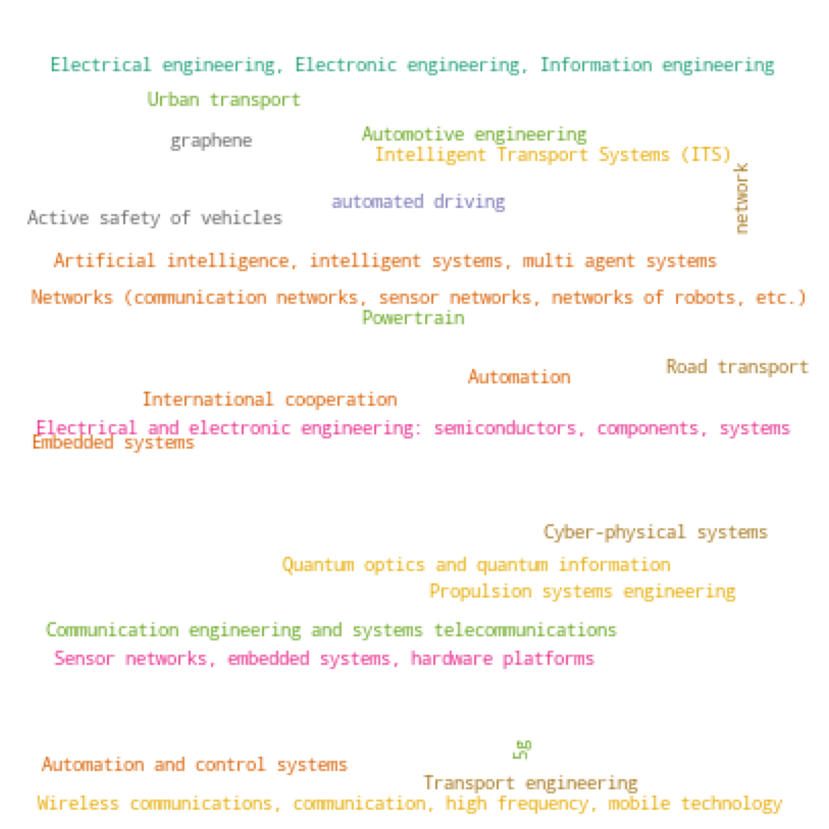

In [20]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
Operations ='''The majority of Bosch Group businesses are grouped into the following four business sectors.[19]

Mobility solutions'''
all_headlines = Operations
#all_headlines = """
#When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches; they only consider the perfect match between an extracted segment and the correct prediction for that tag.
#Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
#"""
stopwords = STOPWORDS
stopwords = ["Bosch", "Robert", "offer", "include", "sector", "Home", "product", "year", "total", "January", "Grow", "high", "point", "products", "service", "systems", "percent", "offers", "tool", "areas", "building", "start", "new", "well", "includes", "within"] + list(STOPWORDS)
wordcloud = WordCloud(colormap = 'Dark2_r', min_font_size=9, max_font_size=9, width=400, height=400, collocations = False, stopwords=stopwords, background_color="white", max_words=25).generate_from_frequencies(bibDict)#generate(keyW)#generate_from_frequencies(word_cloud_lst)#.generate(all_headlines)
#rcParams['figure.figsize'] = [10.0, 10.0]
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordC')
#plt.show()

PPTX

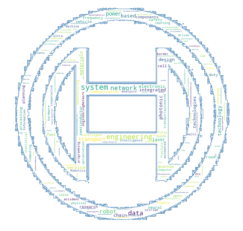

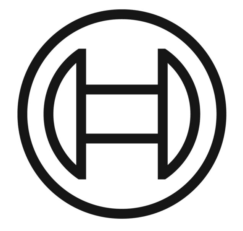

In [63]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = keyW 
#'''Ich hab nun schon ein paar Python Progrämmchen geschrieben und stosse immer wieder auf das gleiche Problem, finde aber keine elegante Lösung dazu. Ich versuche, mich beim Coden möglichst an den Style Guide (PEP 8 - http://www.python.org/dev/peps/pep-0008/) zu halten. Dieser empfiehlt, die maximale Länge einer Zeile auf 79 Zeichen zu beschränken. Mein Problem ist nun das folgende: wie definiere ich am besten einen langen String? Beispiel:
#CODE: ALLES AUSWÄHLEN'''

#text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "/content/Bosch.jpg")).crop((250, 130, 850, 700)))#alice_mask.png
#croppedIm = Image1.crop((130, 120, 200, 200)) 
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=200, mask=alice_mask,
               stopwords=stopwords, contour_width=0.1, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice1.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

#Wäre cool wenn wordcloud2 funktioniert....

In [99]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

listOfKeys = getKeysByValue(d, 2)
print("Keys with value equal to 7: ")
#Iterate over the list of keys
for key  in listOfKeys:
        print(key)

Keys with value equal to 7: 
INFINEON TECHNOLOGIES AUSTRIA  AG
VIRTUAL VEHICLE RESEARCH GMBH
MATERIALS CENTER LEOBEN FORSCHUNG GMBH
INFINEON TECHNOLOGIES AG
SEMIKRON ELEKTRONIK GMBH & CO. KG
ION BEAM SERVICES
COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES
AIXTRON SE
EV GROUP E. THALLNER GMBH
CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA
UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS
UNIVERSITE DE LILLE
ARKEMA FRANCE SA
VRIJE UNIVERSITEIT BRUSSEL


In [91]:
d=Partix
print(7 in d.values())

True


In [125]:
from posixpath import join
import pptx.util
from PIL import Image

#mind. eines von folgenden Modulen wird benötigt
from pptx import Presentation
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Cm
from pptx.dml.color import RGBColor

REPLACEMENT_IMG="Herunterladen.jpg"

prs  = Presentation('/content/Vorlage.pptx')
counter = 0
'''
x=shape.left
y=shape.top
width=shape.width
height=shape.height
'''
Liste=np.empty((0,4),int)

slide = prs.slides[2]
pic = slide.shapes.add_picture("/content/kat.png", 2000000, 1000000, 8000000, 4000000)

for shape in prs.slides[3].shapes:
  if not shape.has_text_frame:
    slide = prs.slides[3]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    Liste = np.append(Liste,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)
    print(type(shape))
    #if counter==2:
    #  shape.add_chart().chart#replace_data()

    #print(shape.text)
    counter+=1
    continue

  #print(type(shape))
  #print(shape.text)


  if "Vaillant GmbH" in shape.text:
    shape.text_frame.paragraphs[0].runs[0].text = b0

  if "Unternehmenseckzahlen" in shape.text:
    print(len(shape.text_frame.paragraphs))
    shape.text_frame.paragraphs[0].runs[0].text = shape.text_frame.paragraphs[0].runs[0].text.replace("2020", e1)
    shape.text_frame.paragraphs[1].runs[0].text = shape.text_frame.paragraphs[1].runs[0].text.replace("Remscheid", c)
    shape.text_frame.paragraphs[2].runs[0].text = shape.text_frame.paragraphs[2].runs[0].text.replace("2,7", d2a)
    shape.text_frame.paragraphs[3].runs[0].text = shape.text_frame.paragraphs[3].runs[0].text.replace("15.000", d1a)
    #shape.text_frame.paragraphs[4].runs[0].text = shape.text_frame.paragraphs[4].runs[0].text
    for i in range(6,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        #print("i: ", i, " j: ", j)
        #print(shape.text_frame.paragraphs[i].runs[j].text)
        shape.text_frame.paragraphs[i].runs[j].text = ""


  if "7 EU Projekte" in shape.text:
    text001="7 von 158" + " EU Projekte im Zeitraum von " + str(Nulla) + " - " + str(Nullb) + " mit einem "
    text002="EU-Zuschuss"
    text003=" von insgesamt "
    text004=str(ggg) + " Mio € ("
    text005=str(list(set(datacb))) + "); Letztes Projekt " + str(gg) + "; Keine Projektkoordination; " + str(cou) \
    + " verschiedene Konsortialpartner in " + str(len(set(dataca))) + " Ländern."


    shape.text = "foobar"
    text_frame = shape.text_frame
    text_frame.clear()
    p = text_frame.paragraphs[0]

    p.add_run().text = text001
    p.runs[0].font.bold = False
    p.add_run().text = text002
    p.runs[1].font.bold = True
    p.add_run().text = text003
    p.runs[2].font.bold = False
    p.add_run().text = text004
    p.runs[3].font.bold = True
    p.add_run().text = text005
    p.runs[4].font.bold = False

    print("jj: ", shape.text)

    #print(shape.text_frame.paragraphs[0].runs[0].text)
    #print(len(shape.text_frame.paragraphs[0].runs), "LLLL")
    '''
    shape.text = shape.text.replace("7 EU Projekte", "7 von 158 EU Projekte")
    shape.text = shape.text.replace("Zeitraum von 1.4.2012 - 30.9.2023", "Zeitraum von " + str(Nulla) + str(Nullb))
    shape.text = shape.text.replace("insgesamt 3,5", "insgesamt " + str(ggg))
    shape.text = shape.text.replace("(FP7 und H2020)", "("+str(list(set(datacb)))+")")
    shape.text = shape.text.replace("Letztes Projekt 2019", "Letztes Projekt " + str(gg))
    shape.text = shape.text.replace("154 v", str(cou) + " v")
    shape.text = shape.text.replace("16 L", str(len(set(dataca))) + " L")
    '''
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(14)
      paragraph.font.bold = True

  if "Ersten 5 EU-Kennwörter: " in shape.text:

    #for i in range(0,5):
      #KeyString="K"+str(i+1)
      #print("33333: ", shape.text_frame.paragraphs[2].runs[3].text)
      #print(KeyString)
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text.replace(KeyString, Keywords[i]))
      shape.text_frame.paragraphs[2].runs[3].text = "1) "+Keywords[0]+" 2) "+Keywords[1]+" 3) "+Keywords[2]+" 4) "+Keywords[3]+" 5) "+Keywords[4]
      #print(Keywords[i])
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text)
    
  if "Unternehmenskennzahl):  " in shape.text:
    shape.text = shape.text.replace(str(986263312), pic0)
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(12)
      paragraph.font.bold = False

    '''
    for i in range(0,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        print("i: ", i, " j: ", j)
        print(shape.text_frame.paragraphs[i].runs[j].text)
    '''

#shape = slide.shapes.add_chart(style, type, Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])

#pic = slide.shapes.add_picture("Herunterladen.jpg", x, y, width, height)
pic = slide.shapes.add_picture("/content/logo.png", Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])



chart = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, Liste[3][0], Liste[3][1], Liste[3][2], Liste[3][3], chart_data)
chart2 = slide.shapes.add_chart(XL_CHART_TYPE.BAR_CLUSTERED, Liste[2][0], Liste[2][1], Liste[2][2], Liste[2][3], chart_data2)

chart.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart.chart.has_title = False
chart.chart.series[0].format.fill.solid()
chart.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)
#chart.chart.vary_by_categories = False

chart2.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart2.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart2.chart.has_title = False
chart2.chart.series[0].format.fill.solid()
chart2.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)

#Seite 4:
counter = 0
counter2 = 0
Liste1=np.empty((0,4),int)
for shape in prs.slides[4].shapes:
  if shape.has_text_frame:
    #print(counter2, shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if counter2 >= 5 and counter2 <= 11:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      p = text_frame.paragraphs[0]
      
      p.add_run().text = dataS4[counter2-5] + "\n"
      p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[0].font.name = 'Thaoma'
      p.runs[0].font.bold = True
      p.runs[0].font.size = Pt(12)
      p.add_run().text = "Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner"
      #print("Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      #str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner")
      p.runs[1].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[1].font.bold = False
      p.runs[1].font.size = Pt(12)
      #print(shape.text)
    counter2 += 1

  #Namen in dataS4 gespeichert

  #print(shape)
  if not shape.has_text_frame:
    #if counter == 1:
    #print("qqq", shape)
    slide = prs.slides[4]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    #print(t)
    Liste1 = np.append(Liste1,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)

    counter+=1
    continue

#print("hhh: ", Liste1)
pic = slide.shapes.add_picture("/content/alice1.png", Liste1[1][0], Liste1[1][1], Liste1[1][2], Liste1[1][3]) #wordC.png

#Seite5
for shape in prs.slides[5].shapes:
  if shape.has_text_frame:
    #print(counter2, shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0

#Seite6
counter = 0
for shape in prs.slides[6].shapes:
  if shape.has_text_frame:
    print(shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if "Zusammenarbeit in 3" in shape.text:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      #p = text_frame.paragraphs[0]

      for o in reversed(range(1,7)):
        #print(o)
        if o in d.values():
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]#2*counter
          p.level = 0
          p.add_run().text = "Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter+1]
          p.level = 1
          p.add_run().text = str(getKeysByValue(d, o)) + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(12)
          counter += 1
        if o==1:
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]
          p.level = 0
          p.add_run().text = "Mit den übrigen " + str(len(PartiSet) - len(Partix)) + " der insgesamt "+ str(len(PartiSet)) +" Projektpartnern wurde jeweils nur in einem Projekt zusammengearbeitet."
          #"Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)
#Partix

#chart.set_x_axis({'name': 'Index', 'num_font':  {'rotation': 45}})
#{'type': 'column'}
print("Position not shape.has_text_frame", Liste)
prs.save("testp.pptx") # save changes

<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.picture.Picture'>
12
jj:  7 von 158 EU Projekte im Zeitraum von 2011-05-01 - 2024-04-30 mit einem EU-Zuschuss von insgesamt 57.5 Mio € (['FP7', 'H2020']); Letztes Projekt 2021; Keine Projektkoordination; 133 verschiedene Konsortialpartner in 14 Ländern.
<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.graphfrm.GraphicFrame'>
Zusammenarbeit in 3 von 7 Projekten
BOSCH THERMOTECHNIK GMBH
DANMARKS TEKNISKE UNIVERSITET
Zusammenarbeit in 2 von 7 Projekten
AEE - INSTITUT FUR NACHHALTIGE TECHNOLOGIEN
BAXI INNOTECH GMBH
ELEMENT ENERGY LIMITED
ENGIE
FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANGEWANDTEN FORSCHUNG E.V.
HEXIS AG
NEDERLANDSE ORGANISATIE VOOR TOEGEPAST NATUURWETENSCHAPPELIJK ONDERZOEK TNO
SOLIDPOWER SPA
SUNFIRE GMBH
THE EUROPEAN ASSOCIATION FOR THE PROMOTION OF COGENERATION VZW
Mit den übrigen 142 der insgesamt 154 Projektpartner wurde jeweils nur in einem Projekt zusammengearbeitet
Vaillant GmbH
Top Koop